### QUESTION: https://github.com/bharatireddy/edyoda-DW-ML-EdYoda-280920/blob/main/Covid_Analysis_Capstone_Project.pdf

Number of rows: 57394
Number of columns: 49

Data types of columns:
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patient

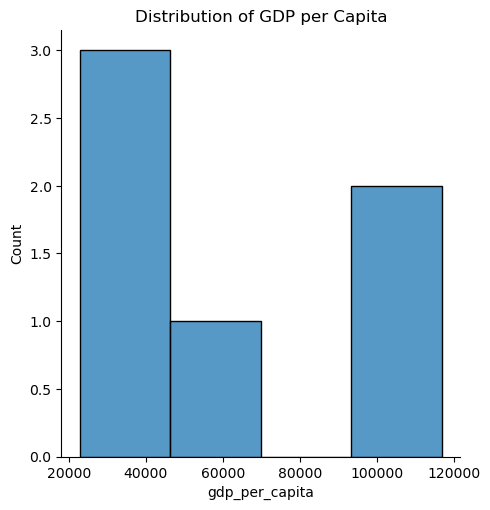

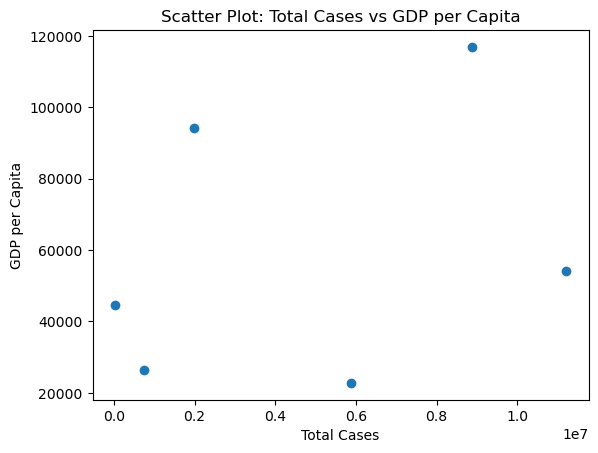

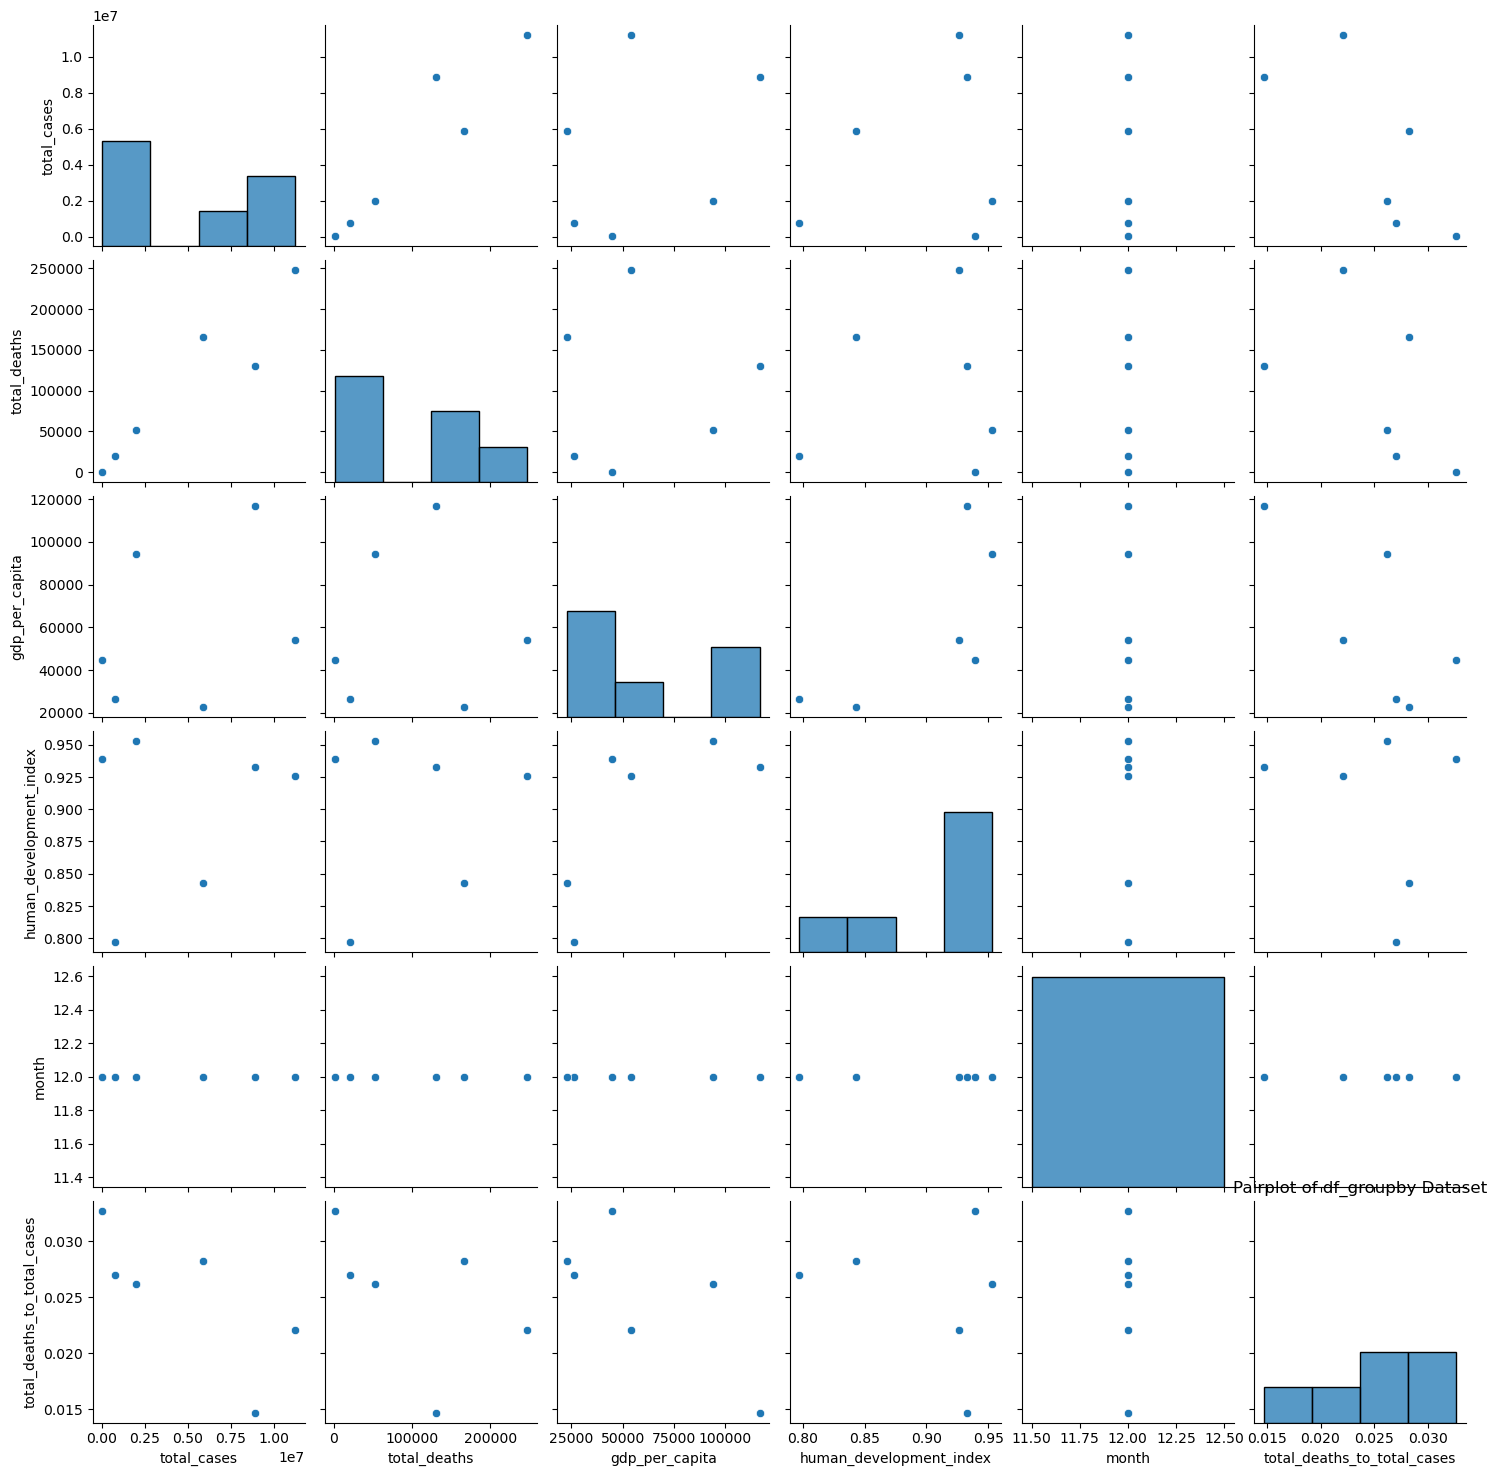

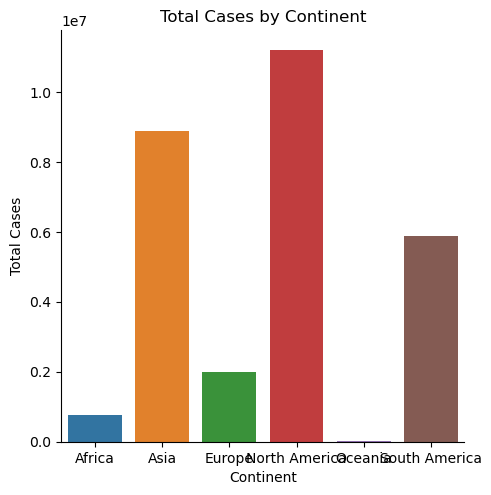

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import the dataset using Pandas from the provided URL
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

# 2. High Level Data Understanding
# a. Find the number of rows & columns in the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# b. Data types of columns
data_types = df.dtypes
print("\nData types of columns:")
print(data_types)

# c. Info & describe of data in the dataframe
print("\nDataframe info:")
print(df.info())

print("\nDataframe description:")
print(df.describe())

# 3. Low Level Data Understanding
# a. Find the count of unique values in the 'location' column
unique_locations = df['location'].nunique()
print("\nNumber of unique locations:", unique_locations)

# b. Find which continent has the maximum frequency using value counts
continent_frequencies = df['continent'].value_counts()
max_frequency_continent = continent_frequencies.idxmax()
print("\nContinent with maximum frequency:", max_frequency_continent)

# c. Find the maximum and mean value in 'total_cases'
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
print("\nMaximum total cases:", max_total_cases)
print("Mean total cases:", mean_total_cases)

# d. Find 25%, 50%, and 75% quartile value in 'total_deaths'
quartiles = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print("\n25% quartile value:", quartiles[0.25])
print("50% quartile value:", quartiles[0.5])
print("75% quartile value:", quartiles[0.75])

# e. Find which continent has the maximum 'human_development_index'
max_hdi_continent = df.loc[df['human_development_index'].idxmax(), 'continent']
print("\nContinent with maximum human development index:", max_hdi_continent)

# f. Find which continent has the minimum 'gdp_per_capita'
min_gdp_continent = df.loc[df['gdp_per_capita'].idxmin(), 'continent']
print("Continent with minimum GDP per capita:", min_gdp_continent)

# 4. Filter the dataframe with only specific columns and update the dataframe
columns_to_keep = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df = df[columns_to_keep]

# 5. Data Cleaning
# a. Remove all duplicate observations
df.drop_duplicates(inplace=True)

# b. Find missing values in all columns
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# c. Remove all observations where the continent column value is missing
df.dropna(subset=['continent'], inplace=True)

# d. Fill all missing values with 0
df.fillna(0, inplace=True)

# 6. Date time format
# a. Convert the date column to datetime format using pandas.to_datetime
df['date'] = pd.to_datetime(df['date'])

# b. Create a new column 'month' after extracting month data from the date column
df['month'] = df['date'].dt.month

# 7. Data Aggregation
# a. Find the max value in all columns using groupby function on 'continent' column
df_groupby = df.groupby('continent').max().reset_index()

# 8. Feature Engineering
# a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' to 'total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

# 9. Data Visualization
# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot
sns.displot(df_groupby['gdp_per_capita'])
plt.title('Distribution of GDP per Capita')
plt.show()

# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
plt.scatter(df_groupby['total_cases'], df_groupby['gdp_per_capita'])
plt.xlabel('Total Cases')
plt.ylabel('GDP per Capita')
plt.title('Scatter Plot: Total Cases vs GDP per Capita')
plt.show()

# c. Plot Pairplot on df_groupby dataset
sns.pairplot(df_groupby)
plt.title('Pairplot of df_groupby Dataset')
plt.show()

# d. Plot a bar plot of 'continent' column with 'total_cases'
sns.catplot(x='continent', y='total_cases', data=df_groupby, kind='bar')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Total Cases by Continent')
plt.show()

# 10. Save the df_groupby dataframe in your local drive using pandas.to_csv function
df_groupby.to_csv('df_groupby.csv', index=False)
